# **마켓과 머신러닝**

* ## 도미 데이터 준비하기
[도미 데이터](http://bit.ly/bream_list)

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

길이와 무게등 특징을 나타내는것을 **feature** 라고함.<br>
점 그래프로 표현한 것을 **scatter plot(산점도)**라 함.<br>
파이썬의 그래프를 그리는 대표적인 패키지는 **matplotlib**임 <br>

<function matplotlib.pyplot.show(*args, **kw)>

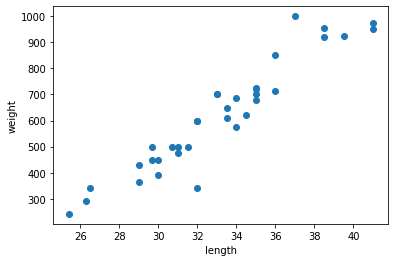

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show

그래프가 일직선에 가까운 형태로 나타나면 **linear(선형)**적이라고 함.

* ## 빙어 데이터 준비하기
[빙어 데이터](http://bit.ly/smelt_list)

In [3]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

데이터 두개 한꺼번에 나타내기

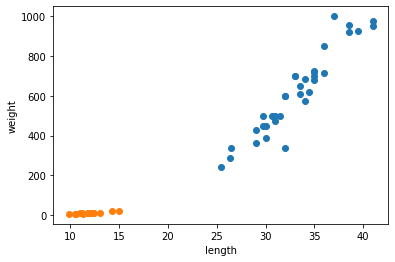

In [4]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* ## k-Neaerest Neighbor(kNN)
k-최근접 이웃

In [5]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

여기선 **scikit-learn**패키지를 사용하는데<br>
이 패키지를 사용하려면 **2차원 리스트**를 만들어야함.

In [6]:
fish_data = [[l, w] for l, w in zip(length, weight)]

In [7]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


2차원 리스트가 만들어진 것을 볼 수 있음.<br><br>
**머신러닝 알고리즘**이 *길이*와 *무게*를 보고 도미와 빙어를<br>구분하는 규칙을 찾는 것이므로<br>
어떤 것이 도미인지 빙어인지 알려 주어야 함.

In [8]:
fish_target = [1] * 35 + [0] * 14;
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


**훈련**시키고 **모델**의 **정확도** 출력

In [9]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
print(kn.score(fish_data, fish_target))

1.0


임의의 값을 넣어 어떤 생선인지 구분해보자.

In [10]:
kn.predict([[30, 600]])

array([1])

도미가 나온 것을 알 수 있음.<br><br>
테스트 데이터를 [ ]로 **두번 묶은 이유**는 <br>현재 훈련한 데이터가 **2차원 배열**이기 때문임.

* ## k-Neaerest Neighbor(kNN) 알고리즘

데이터가 아주 많은 경우 직선거리를 전부 다 계산해야 하므로 <br>
**메모리**와 **시간소모**가 심한 것이 단점임.<br><br>
KNeighborsClassifier 클래스의 **기본값은 5임**.<br>
이 말은 즉슨 테스트 데이터가 들어오면 제일 가까운 5개 중<br>
더 많은 경우를 찾아 답으로 만듦.<br><br>
만약 훈련데이터가 49개 인데 n_neighbors의 값을 49로 할 경우<br>
데이터가 더 많은 도미로만 예측될 것임.

In [11]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
print(kn49.score(fish_data, fish_target))
print(35/49)

0.7142857142857143
0.7142857142857143


여기까지의 [전체 코드](https://bit.ly/hg-01-3)

# **훈련 세트와 테스트 세트**

* ## 지도 학습과 비지도 학습
머신러닝 알고리즘은 크게 **지도 학습**과 **비지도 학습**으로 나뉨.<br>
지도학습에서 데이터는 **input**, 정답은 **target**이라고 함.<br>
이 둘을 합쳐 **training data**임.

* ## 훈련 세트와 테스트 세트
정답을 알려주고 시험을 칠 경우 당연히 100점을 맞을 것이다.<br>
따라서 데이터를 나누거나 또 다른 데이터를 준비하여 <br>
_**훈련 데이터**와 **평가용 데이터**가 달라야 함_.<br><br>
이때 평가에 사용 할 데이터를 **test set**,<br>
훈련에 사용 할 데이터를 **train set** 이라함.<br><br>
또 다시 데이터 준비한다. ([링크](http://bit.ly/bream_smelt))

In [12]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

받아온 데이터를 2차원 배열에 저장

In [13]:
fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]
fish_target = [1]*35 + [0]*14

이때 하나의 생선 데이터를 **sample**이라고 함.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

샘플을 추출하기 위해 슬라이싱을 함.

In [15]:
#슬라이싱 예제
print(fish_data[0:5])
print(fish_data[:5])
print(fish_data[44:])
#데이터 슬라이싱
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]
[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


테스트 데이터와 훈련 데이터로 모델을 훈련하고 점수 출력

In [16]:
kn.fit(train_input,train_target)
kn.score(test_input, test_target)

0.0

문제가 발생함.<br>
훈련 데이터에 도미 밖에 없고, 테스트 데이터에 빙어만 있음.<br><br>
이것을 **sampling bias(샘플링 편향)**이라고 함.

* ## numpy(넘파이)
numpy는 파이썬의 대표적인 array 라이브러리임.<br>

In [17]:
import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


이와 같이 **고차원 배열**을 아주 편하게 만들 수 있음.

In [18]:
print(input_arr.shape)

(49, 2)


여기까지 numpy로 데이터를 만들었으니 train set와 test set을 만들어야함.<br>
배열을 random으로 섞어서 나누는 방식을 사용해야함.<br><br>

**섞을 때 주의 할 점!!**<br>
2차원 배열에서 feature 정보들은 그대로 여야함.<br><br>

여기선 0부터 48까지 수를 섞어서 배열을 참조하도록 함.

In [22]:
np.random.seed(42) #seed값은 자유
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


이제 train set과 test set으로 나눠야함.<br>
numpy에선 슬라이싱 외에 **array indexing**기능을 제공함.<br>
array indexing이란 다차원 배열일 때 <u>**한가지의 index가 아닌**<br>
**여러개의 inde로 한 번에 여러 개의 원소를 선택**</u> 할 수 있음.

In [23]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [24]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
print(input_arr[13],train_input[0])

[ 32. 340.] [ 32. 340.]


In [25]:
#나머지 test set도 만들어줌.
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

잘 섞였는지 산점도 그래프로 확인.

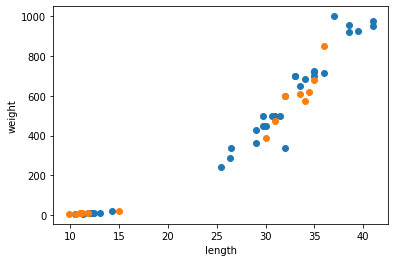

In [26]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

자 이제 이 데이터를 가지고 머신러닝(kNN)을 돌려보자.<br>
KNeighborsClassifier 클래스의 객체는 한번 fit 할 때 마다<br>
이전에 학습한 것을 잊어버리므로<br>
새로 학습 시킬땐 객체를 하나 더 만들어야함.<br><br>
여기선 그냥 이전객체에 다시 학습함.

* ## 두 번째 머신러닝 프로그램

In [28]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [29]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [30]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

데이터가 아주 이뻐서 score가 1.0 이 나온 것을 알 수 있다.

여기까지의 [전체 코드](https://bit.ly/hg-02-1)